/tmp/ipython-input-4088435636.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')


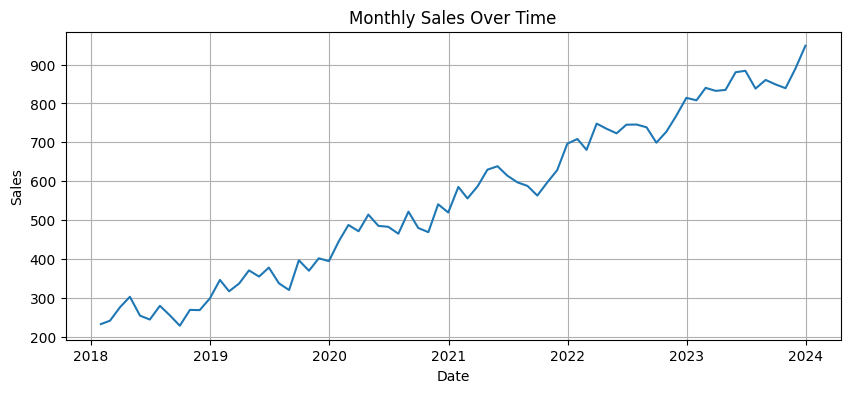

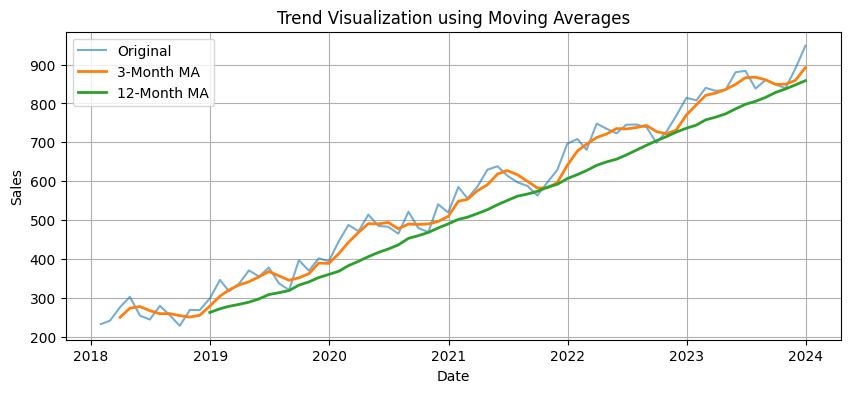

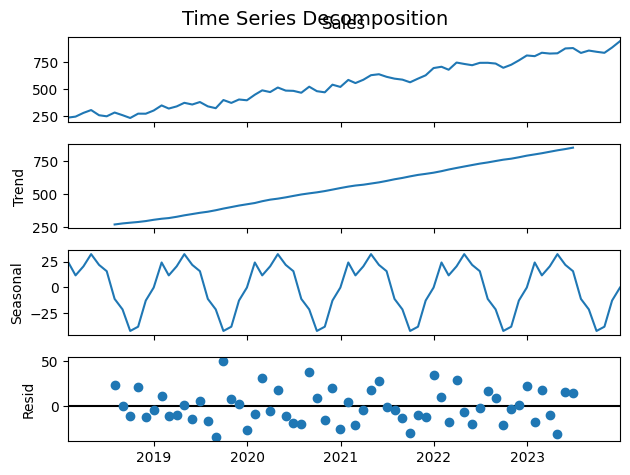

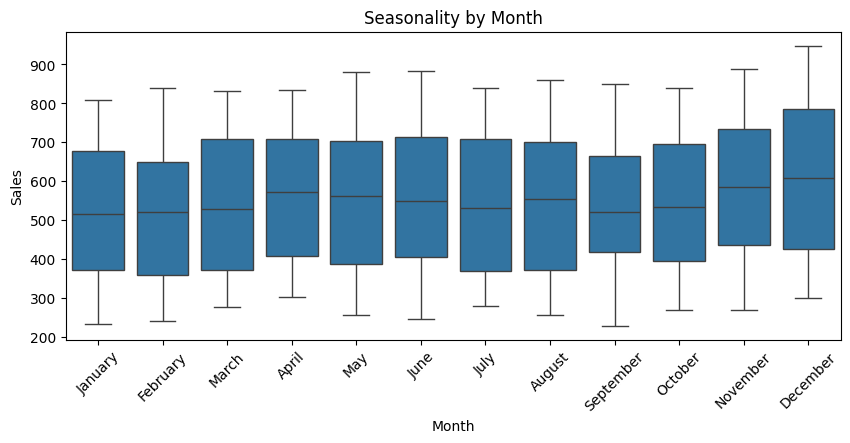

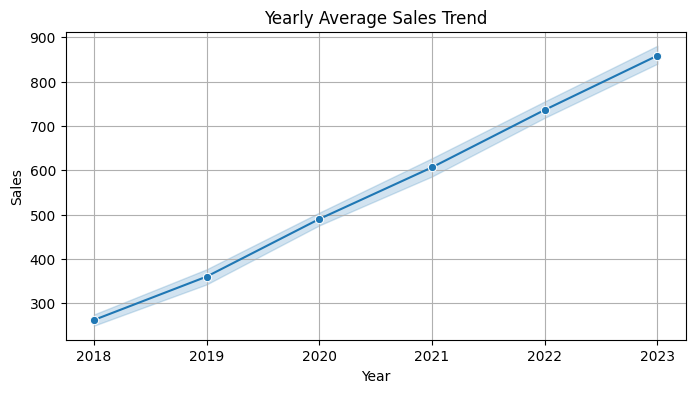

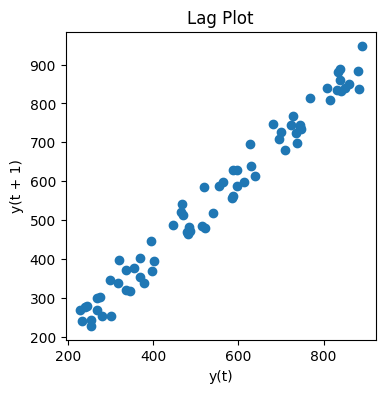

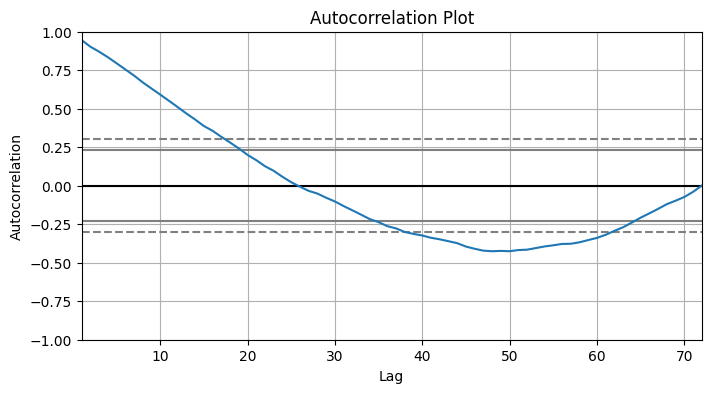

✅ Time Series Visualization Complete!


In [1]:
# Time Series Visualization and Decomposition Example
# Requirements: pandas, matplotlib, seaborn, statsmodels
# pip install pandas matplotlib seaborn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# -----------------------------
# 1. Generate or Load Time Series Data
# -----------------------------
# Example: synthetic monthly sales data
np.random.seed(42)
date_rng = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')
sales = 200 + 10*np.arange(len(date_rng)) + 40*np.sin(2*np.pi*date_rng.month/12) + np.random.normal(0, 25, len(date_rng))
df = pd.DataFrame({'Date': date_rng, 'Sales': sales})

# -----------------------------
# 2. Basic Line Plot
# -----------------------------
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Sales'], color='tab:blue')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# -----------------------------
# 3. Moving Average (Trend Smoothing)
# -----------------------------
df['Sales_MA3'] = df['Sales'].rolling(window=3).mean()   # 3-month moving average
df['Sales_MA12'] = df['Sales'].rolling(window=12).mean() # 12-month moving average

plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Sales'], label='Original', alpha=0.6)
plt.plot(df['Date'], df['Sales_MA3'], label='3-Month MA', linewidth=2)
plt.plot(df['Date'], df['Sales_MA12'], label='12-Month MA', linewidth=2)
plt.title('Trend Visualization using Moving Averages')
plt.xlabel('Date'); plt.ylabel('Sales')
plt.legend(); plt.grid(True); plt.show()

# -----------------------------
# 4. Seasonal Decomposition
# -----------------------------
df.set_index('Date', inplace=True)
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plot trend, seasonal, and residual components
decomposition.plot()
plt.suptitle('Time Series Decomposition', fontsize=14)
plt.show()

# -----------------------------
# 5. Yearly and Monthly Patterns (Seasonality)
# -----------------------------
df['Year'] = df.index.year
df['Month'] = df.index.month_name()

plt.figure(figsize=(10,4))
sns.boxplot(x='Month', y='Sales', data=df, order=['January','February','March','April','May','June',
                                                  'July','August','September','October','November','December'])
plt.title('Seasonality by Month')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(x='Year', y='Sales', data=df, marker='o')
plt.title('Yearly Average Sales Trend')
plt.grid(True)
plt.show()

# -----------------------------
# 6. Lag Plot and Autocorrelation
# -----------------------------
from pandas.plotting import lag_plot, autocorrelation_plot

plt.figure(figsize=(4,4))
lag_plot(df['Sales'])
plt.title('Lag Plot')
plt.show()

plt.figure(figsize=(8,4))
autocorrelation_plot(df['Sales'])
plt.title('Autocorrelation Plot')
plt.show()

print("✅ Time Series Visualization Complete!")
